# Credit Default Model Example

## Imports

In [48]:
import os
import numpy as np
import pandas as pd

from typing import Optional

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib


In [4]:
DATA_PATH = "data.xls"

## Data Retreival

In [11]:
def retrieve_data(data_path: str | os.PathLike) -> pd.DataFrame:
    df = pd.read_excel(data_path)
    df.columns = df.iloc[0, :]
    df = df.drop(0)
    df = df.reset_index().dropna()
    return df


In [51]:
df = retrieve_data(DATA_PATH)
X = df[[col for col in df.columns if col != "default payment next month"]]
y = df["default payment next month"].astype('int')
X.columns

Index(['index', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object', name=0)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

## Training

In [34]:
model = RandomForestClassifier(
    max_depth=4, random_state=42
)

In [37]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

## Testing

In [49]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(tn, fp, fn, tp)

7461 281 1538 620


In [41]:
f1_score = f1_score(y_test, y_pred)
print(f1_score)

0.4053612291598562


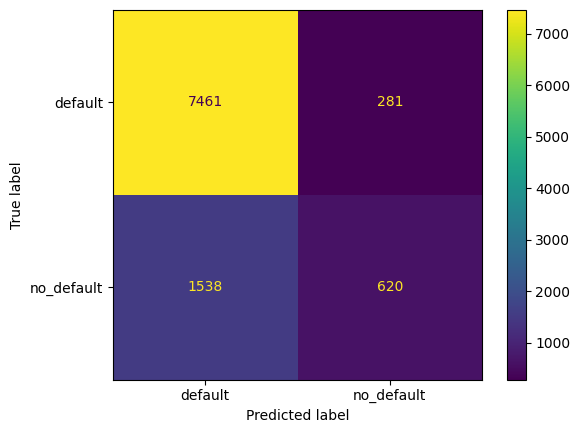

In [50]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['default', 'no_default'])
cmd.plot()

## Save Data for Fairness Eval

In [61]:
df_save = X_test.loc[:, ['SEX', 'AGE']]
df_save.loc[:, 'y_true'] = y_test
df_save.loc[:, 'y_pred'] = y_pred
df_save = df_save.reset_index()
df_save = df_save.drop(columns='index')
df_save.to_csv("fairness_data.csv")

In [62]:
df_save

,SEX,AGE,y_true,y_pred
0,1,25,0,0
1,2,26,0,0
2,2,32,0,0
3,1,49,0,0
4,2,36,1,0
...,...,...,...,...
9895,2,26,1,0
9896,1,32,0,0
9897,2,41,0,0
9898,1,30,0,0
